In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#There is a difference of using the plt.plot() vs the object-oriented version of plotting,
#the main takeaway is the below version is the object-oriented version, and how this 
#course will continue to teach how we're plotting. (see step #2 for object-oriented version)

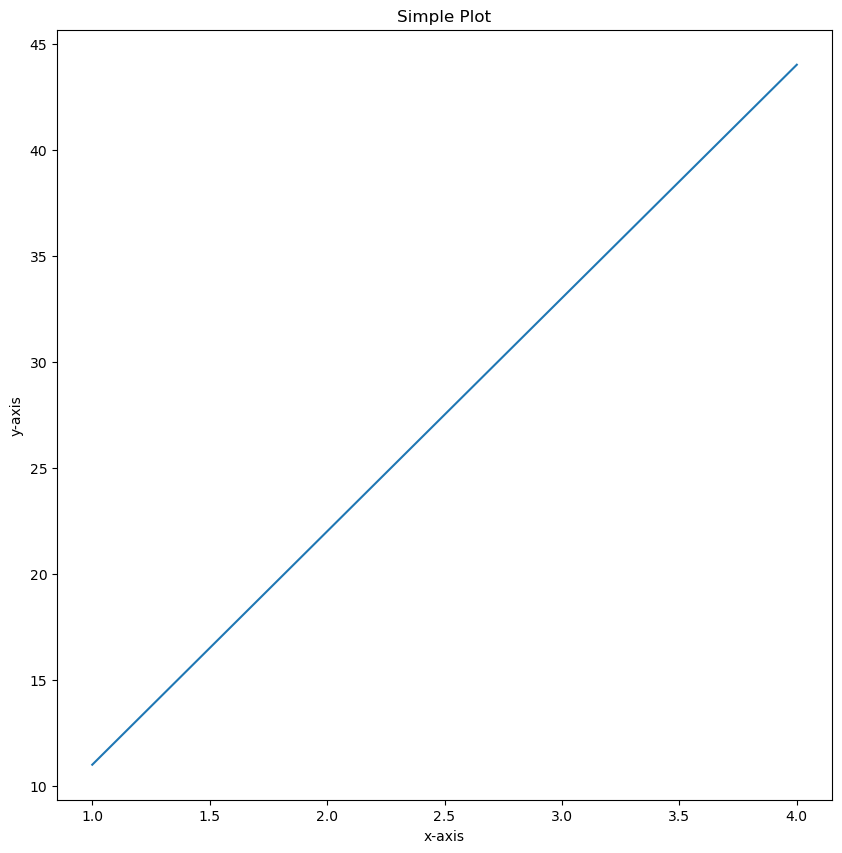

In [2]:
#1. Prepare the data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

#2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) #(width, height)

#3. Plot data
ax.plot(x, y)

#4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")
#5.Save and show the plot (figure)
fig.savefig("sample-plot.png")

## Making figures with NumPy arrays

We're intersted in making the following plots:
* Line Plot
* Scatter Plot
* Bar Plot
* Histogram Plot
* Subplots

In [3]:
#Create some data
x = np.linspace(0, 10, 100)

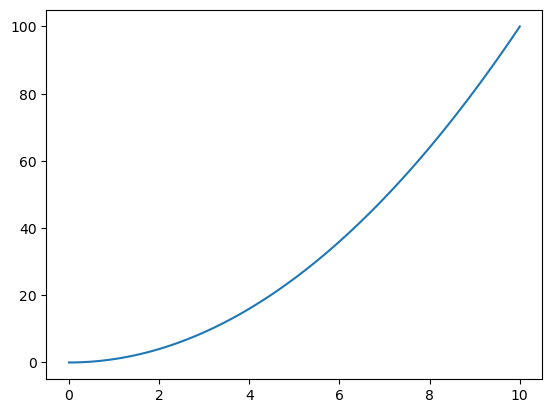

In [4]:
#Plot the data
fig, ax = plt.subplots()
ax.plot(x, x**2);

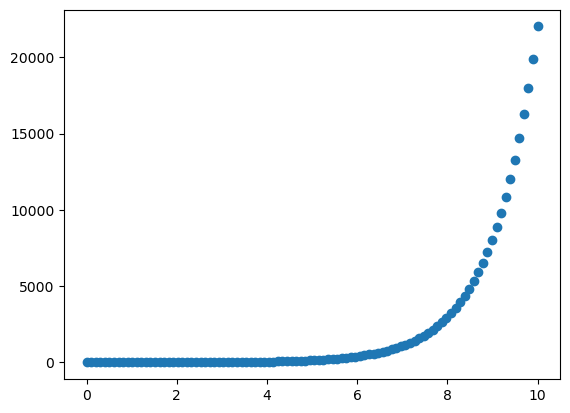

In [5]:
#Use the same data for a scatter plot
fig, ax= plt.subplots()
ax.scatter(x, np.exp(x));

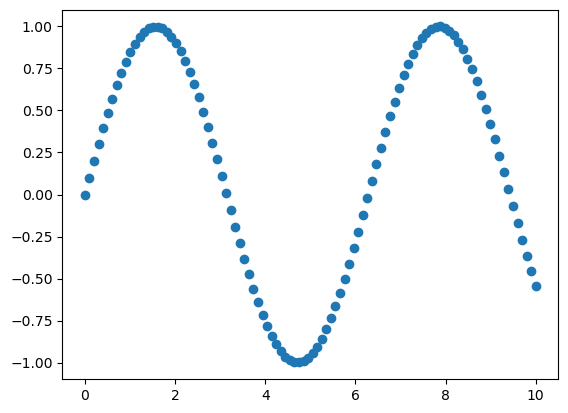

In [6]:
#Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

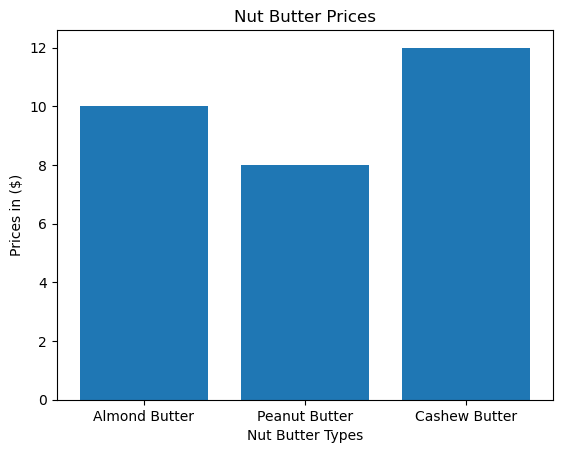

In [7]:
#Create a plot from a dictionary
nut_butter_prices = {"Almond Butter": 10,
                     "Peanut Butter": 8,
                     "Cashew Butter": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title="Nut Butter Prices",
      xlabel="Nut Butter Types",
      ylabel="Prices in ($)");

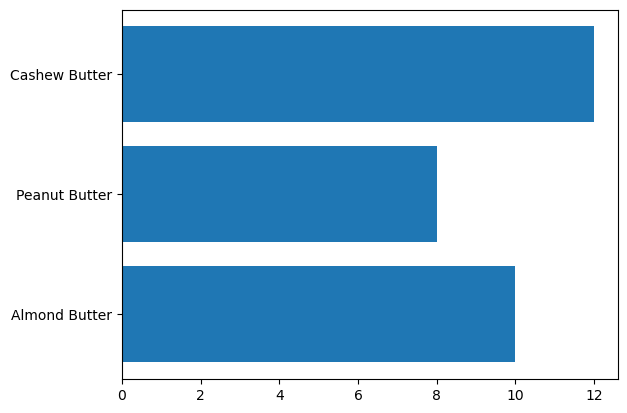

In [8]:
#In order to make a horizontal bar graph with dictionary information, we need
#to convert the keys and values into lists for it to work.
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

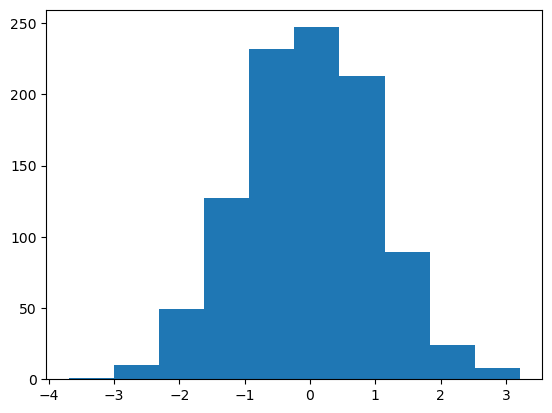

In [9]:
#Standard normal distribution - symmetrical bell curve - randn is for normal dist.
#This shows a histogram using normal dist.
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

#### Subplots option 1

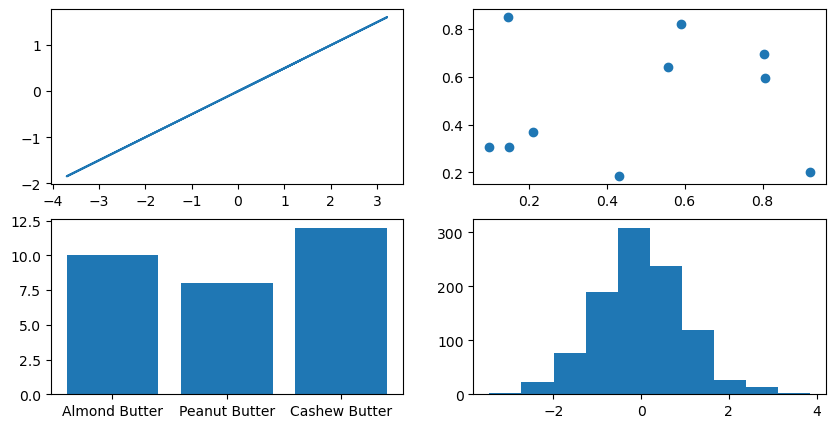

In [10]:
#Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

#Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

#### Subplots option 2

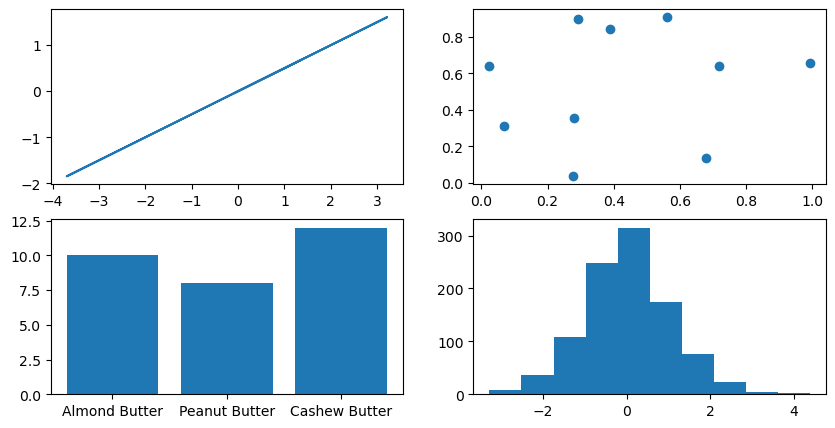

In [11]:
#Subplots option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

#Plot to each diff index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting form Pandas DataFrames

In [44]:
# Make a DataFrame
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

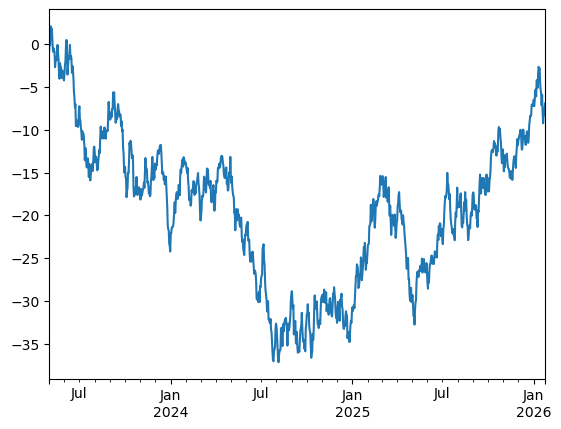

In [45]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('5/1/2023', periods=1000))
ts = ts.cumsum()

ts.plot()

In [46]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [47]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\d_jon\AppData\Local\Temp\ipykernel_30156\2276578600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [48]:
type(car_sales["Price"][0])

str

In [49]:
#Remove last 2 zeros. Since the price is a string, we utilize the str function
#We use slicing to get rid of the last two zeros

car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [50]:
car_sales["Sale Date"] = pd.date_range("4/29/2023", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-04-29
1,Honda,Red,87899,4,5000,2023-04-30
2,Toyota,Blue,32549,3,7000,2023-05-01
3,BMW,Black,11179,5,22000,2023-05-02
4,Nissan,White,213095,4,3500,2023-05-03
5,Toyota,Green,99213,4,4500,2023-05-04
6,Honda,Blue,45698,4,7500,2023-05-05
7,Honda,Blue,54738,4,7000,2023-05-06
8,Toyota,White,60000,4,6250,2023-05-07
9,Nissan,White,31600,4,9700,2023-05-08


In [56]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-04-29,4000
1,Honda,Red,87899,4,5000,2023-04-30,9000
2,Toyota,Blue,32549,3,7000,2023-05-01,16000
3,BMW,Black,11179,5,22000,2023-05-02,38000
4,Nissan,White,213095,4,3500,2023-05-03,41500
5,Toyota,Green,99213,4,4500,2023-05-04,46000
6,Honda,Blue,45698,4,7500,2023-05-05,53500
7,Honda,Blue,54738,4,7000,2023-05-06,60500
8,Toyota,White,60000,4,6250,2023-05-07,66750
9,Nissan,White,31600,4,9700,2023-05-08,76450


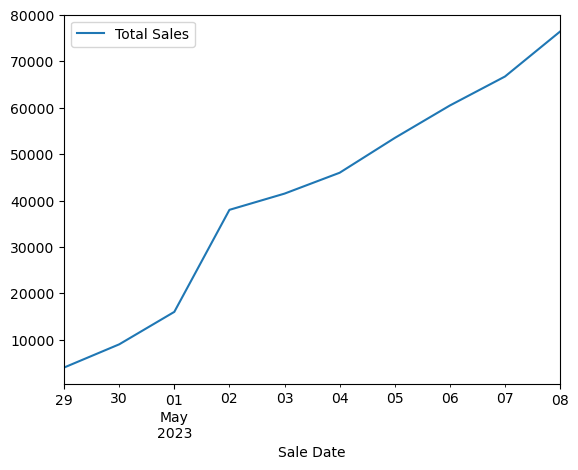

In [57]:
#Plot the total sales using pandas usage of matplotlib
car_sales.plot(x="Sale Date",
              y="Total Sales");

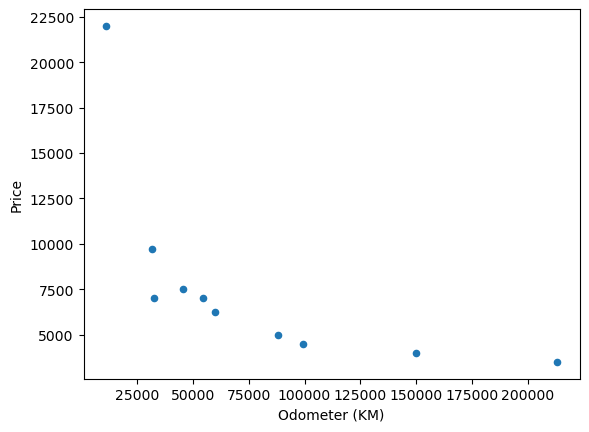

In [58]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)",
              y="Price", kind="scatter");

In [59]:
#Bar graphs
x = np.random.rand(10, 4)
x

#Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.445859,0.210774,0.143894,0.100346
1,0.925139,0.920220,0.590854,0.721129
2,0.221551,0.207879,0.419770,0.498249
3,0.285329,0.034503,0.871646,0.143008
4,0.890617,0.053861,0.408684,0.122450
5,0.395665,0.072135,0.132722,0.373450
6,0.451371,0.839101,0.868620,0.892519
7,0.230943,0.224587,0.453700,0.616693
8,0.622965,0.716118,0.715106,0.282693
9,0.541041,0.745560,0.637625,0.541225


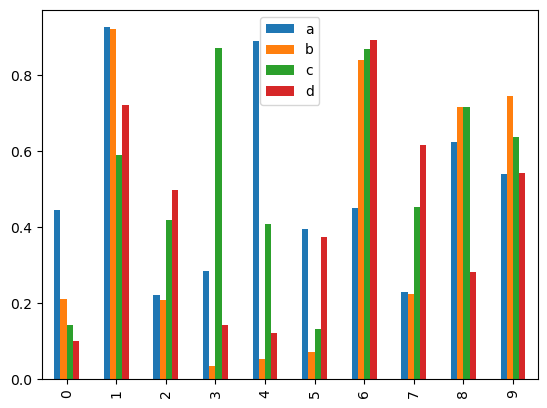

In [61]:
df.plot.bar();

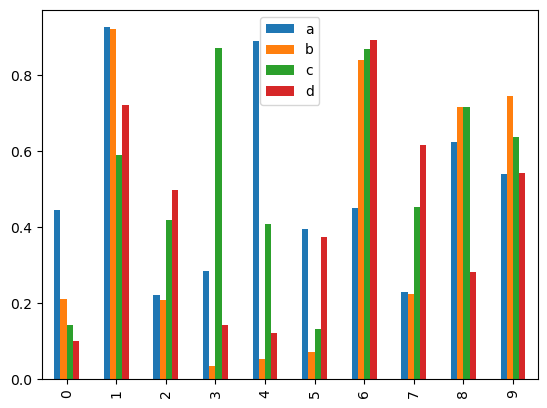

In [63]:
df.plot(kind="bar");

In [64]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-04-29,4000
1,Honda,Red,87899,4,5000,2023-04-30,9000
2,Toyota,Blue,32549,3,7000,2023-05-01,16000
3,BMW,Black,11179,5,22000,2023-05-02,38000
4,Nissan,White,213095,4,3500,2023-05-03,41500
5,Toyota,Green,99213,4,4500,2023-05-04,46000
6,Honda,Blue,45698,4,7500,2023-05-05,53500
7,Honda,Blue,54738,4,7000,2023-05-06,60500
8,Toyota,White,60000,4,6250,2023-05-07,66750
9,Nissan,White,31600,4,9700,2023-05-08,76450


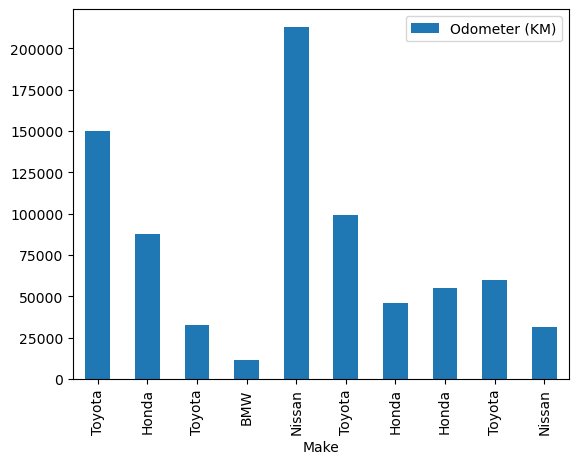

In [65]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

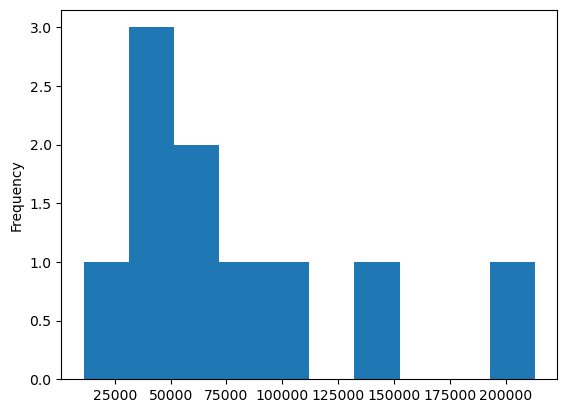

In [66]:
car_sales["Odometer (KM)"].plot.hist();

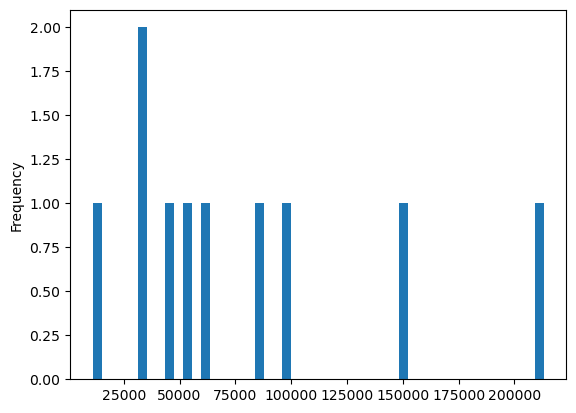

In [71]:
#bins are kind of the sample resolution on a given histogram; default seems to be 10
#they also set the width of the bars in a histogram
car_sales["Odometer (KM)"].plot.hist(bins=50);

In [72]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
heart_disease['age'].max() - heart_disease['age'].min()

48

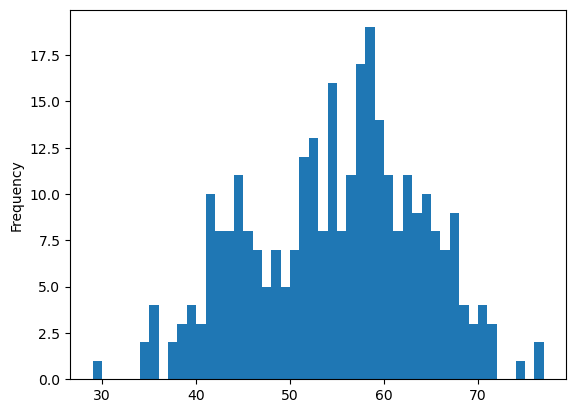

In [80]:
heart_disease['age'].plot.hist(bins=48);

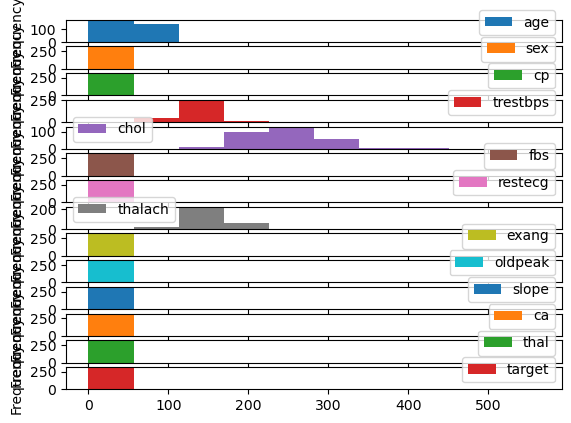

In [82]:
heart_disease.plot.hist(subplots=True);

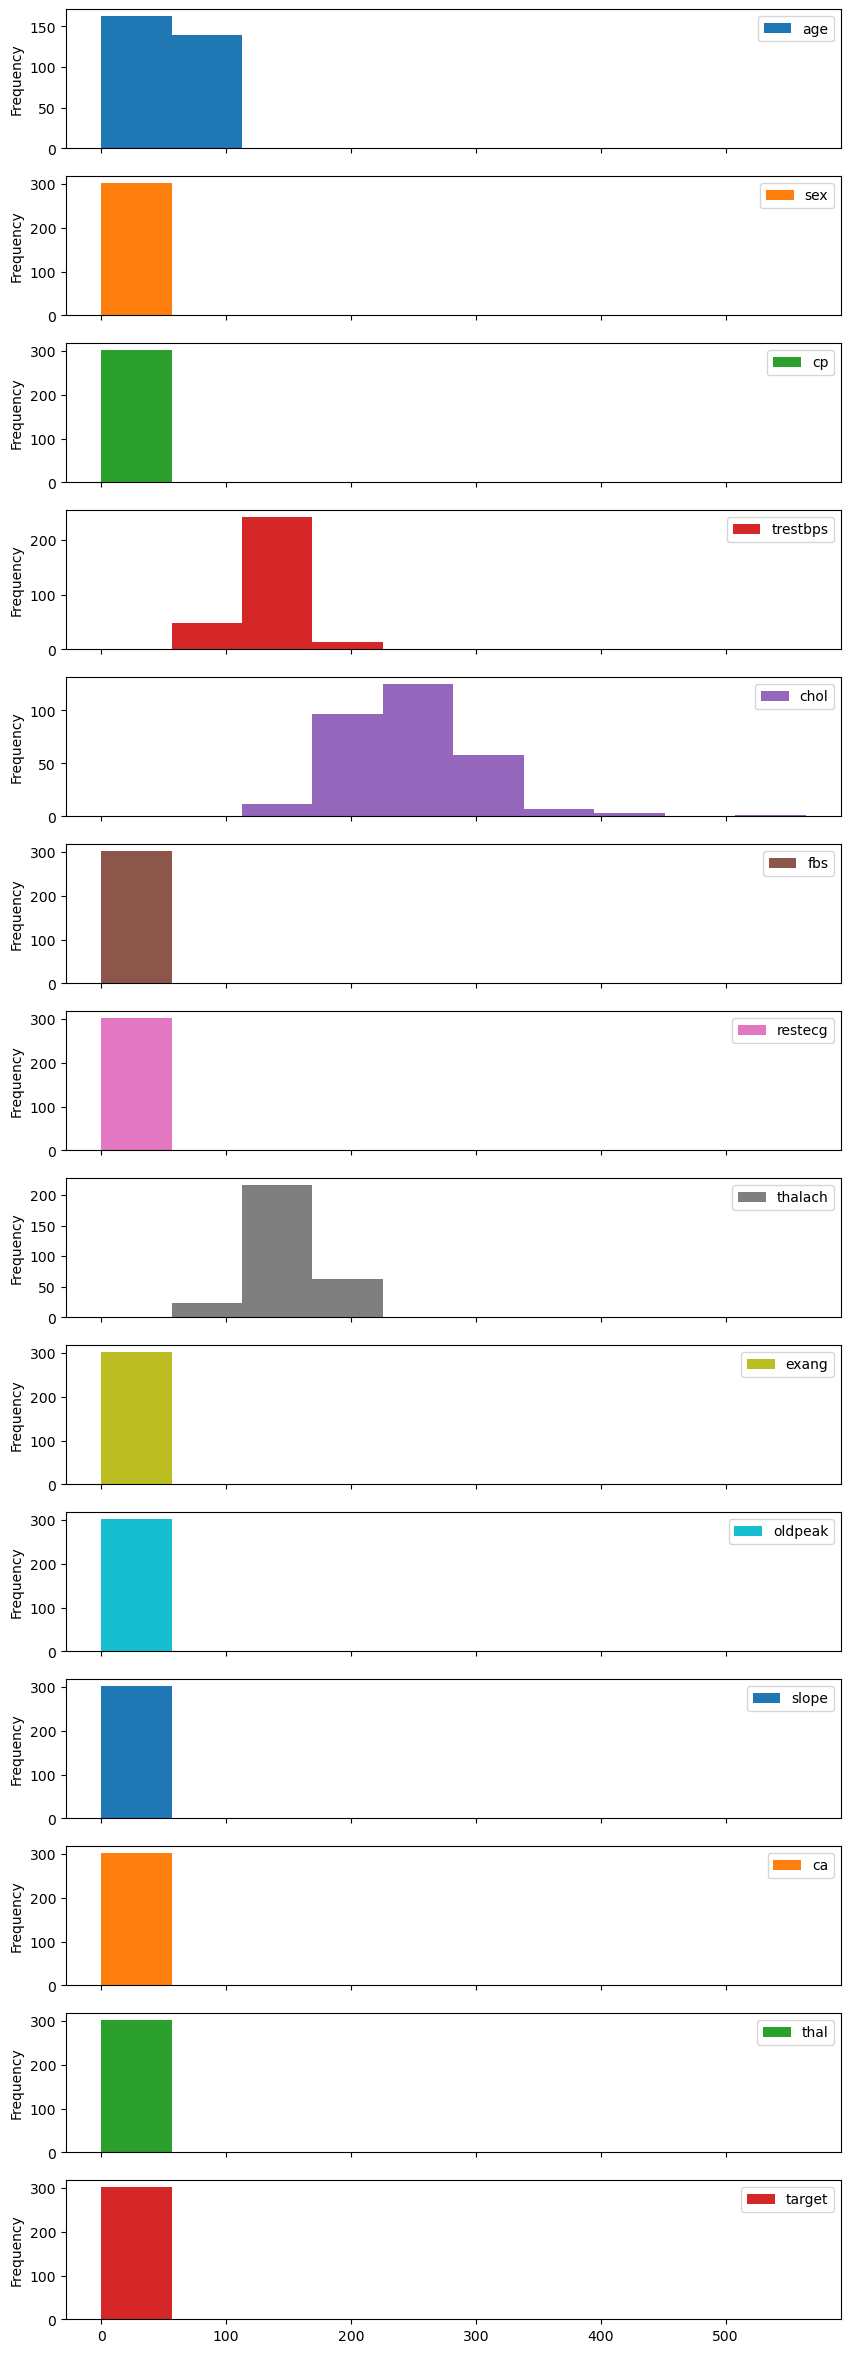

In [84]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

## When to use the pyplot method vs matplotlib OO method of plotting
* When making quick plots, using pyplot is good
* When making something more advanced, then the OO method is better

In [85]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


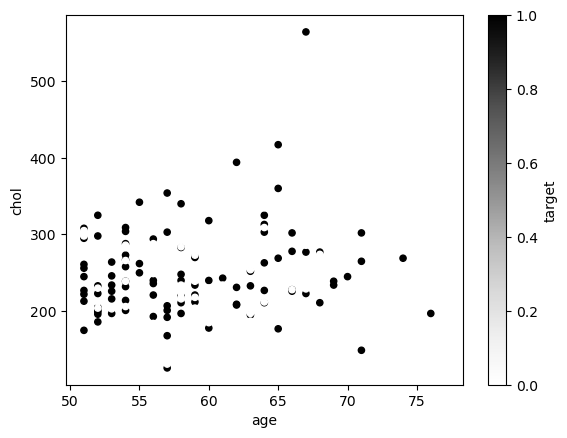

In [89]:
#Pyplot method
over_50.plot(kind='scatter',
            x= 'age',
            y='chol',
            c='target');

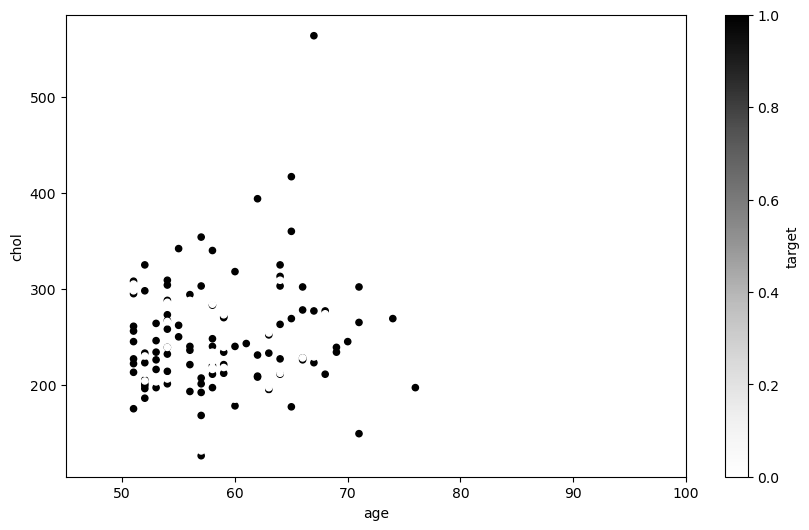

In [94]:
#OO method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);
#we can limit the x-axis with something like set_xlim
ax.set_xlim([45, 100]);

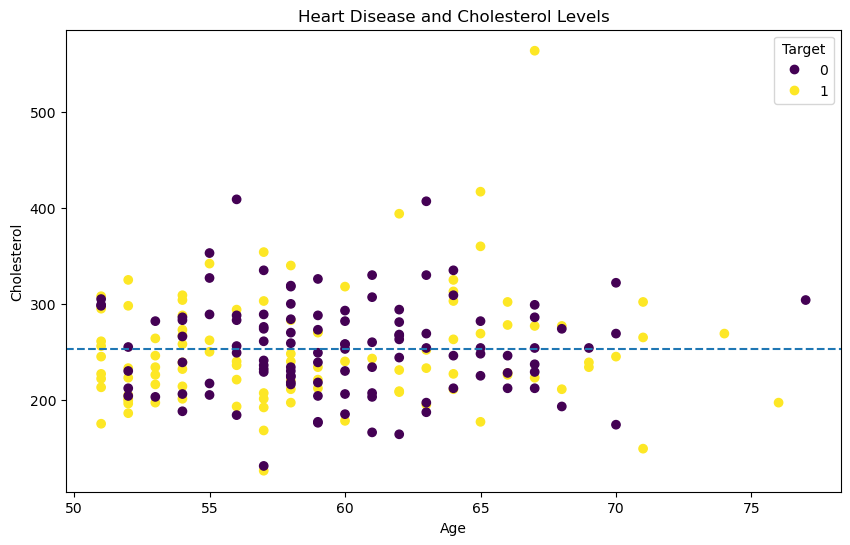

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'])

#customize
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel='Age',
      ylabel='Cholesterol')

#legend
ax.legend(*scatter.legend_elements(), title='Target')

#horizontal line
ax.axhline(over_50['chol'].mean(),
          linestyle='--');

In [102]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [103]:
#Create a subplot of chol, age, and thalach (max heartrate)

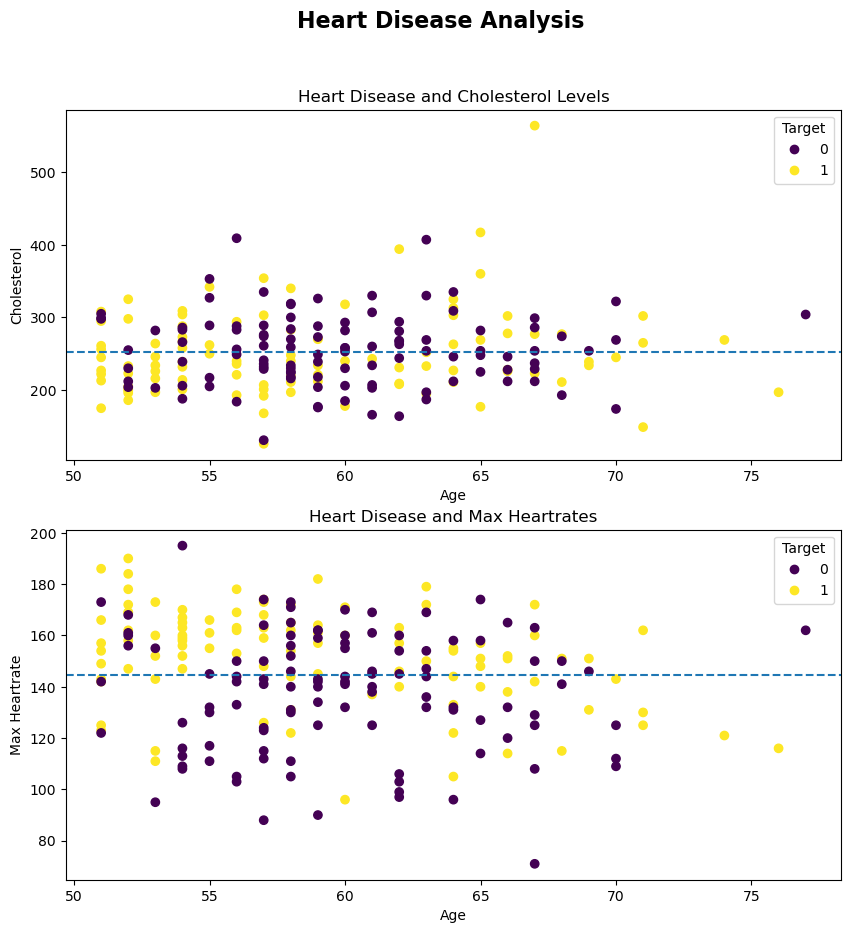

In [109]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10));

#I decided to create some variables
over_age = over_50['age']
over_chol = over_50['chol']
over_thalach = over_50['thalach']
over_target = over_50['target']

#Add data to ax0
scatter = ax0.scatter(x=over_age,
                     y=over_chol,
                     c=over_target)

#Customize
ax0.set(title="Heart Disease and Cholesterol Levels",
       xlabel='Age',
       ylabel='Cholesterol');

#Add legend to ax0
ax0.legend(*scatter.legend_elements(), title='Target')
#Add a hor. mean line
ax0.axhline(y=over_chol.mean(),
           linestyle='--');

#Create the other subplot

#Add data to ax1
scatter = ax1.scatter(x=over_age,
                     y=over_thalach,
                     c=over_target)

#Customize
ax1.set(title="Heart Disease and Max Heartrates",
       xlabel='Age',
       ylabel='Max Heartrate');

#Add legend to ax1
ax1.legend(*scatter.legend_elements(), title='Target')
#Add a hor. mean line
ax1.axhline(y=over_thalach.mean(),
           linestyle='--')

#Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

### Customizing Matplotlib plots and styling

In [110]:
#See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [111]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-04-29,4000
1,Honda,Red,87899,4,5000,2023-04-30,9000
2,Toyota,Blue,32549,3,7000,2023-05-01,16000
3,BMW,Black,11179,5,22000,2023-05-02,38000
4,Nissan,White,213095,4,3500,2023-05-03,41500
5,Toyota,Green,99213,4,4500,2023-05-04,46000
6,Honda,Blue,45698,4,7500,2023-05-05,53500
7,Honda,Blue,54738,4,7000,2023-05-06,60500
8,Toyota,White,60000,4,6250,2023-05-07,66750
9,Nissan,White,31600,4,9700,2023-05-08,76450


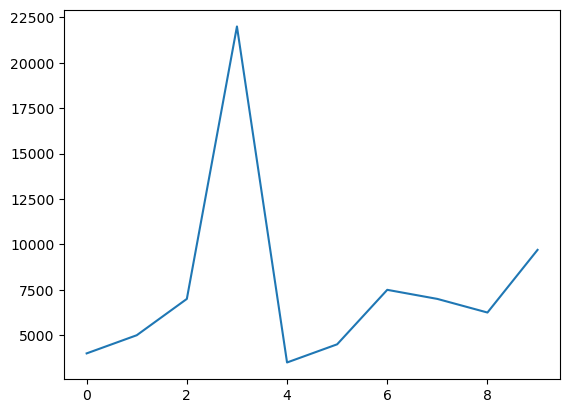

In [112]:
car_sales["Price"].plot();

In [117]:
plt.style.use('dark_background')

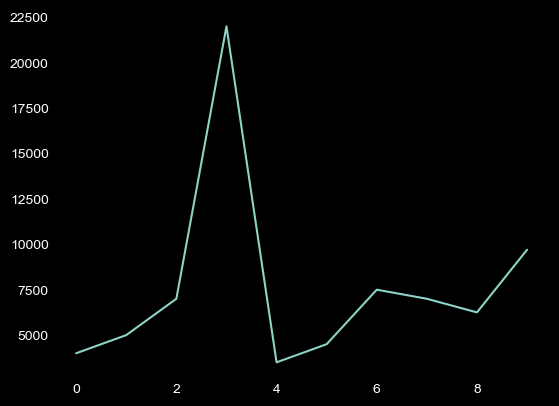

In [118]:
car_sales["Price"].plot();

In [120]:
plt.style.use('seaborn-v0_8')

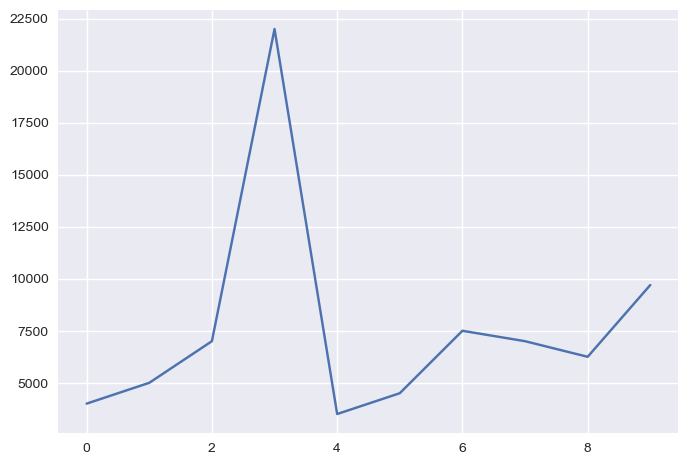

In [121]:
car_sales["Price"].plot();

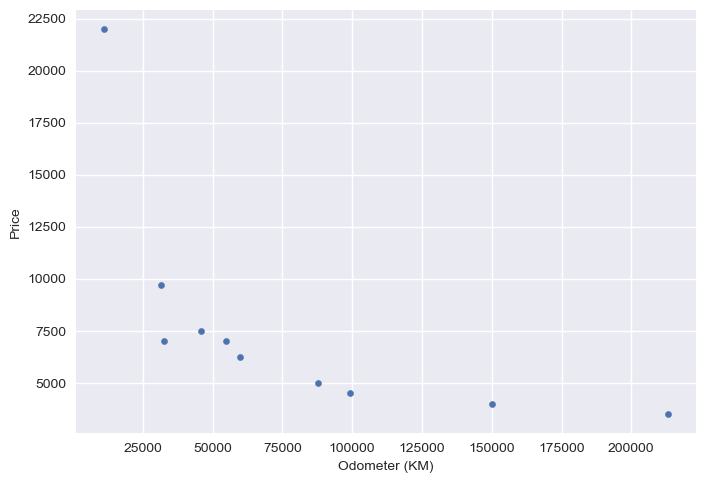

In [122]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

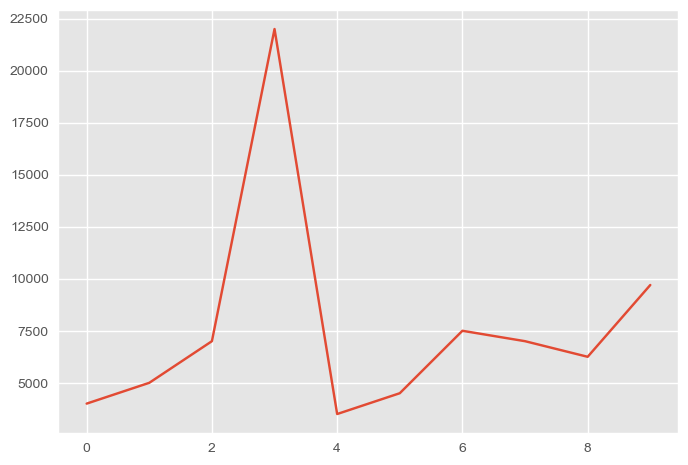

In [123]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [124]:
x = np.random.randn(10 ,4)
x

array([[-0.79499396,  0.90607079,  1.85219318, -0.77674031],
       [ 0.10578656,  0.17089176,  0.22418706, -0.18699529],
       [-1.24774319, -0.02463444,  1.35452581, -1.48521563],
       [-0.61694744, -1.62963853, -0.10344664,  1.56706034],
       [-1.9156438 , -0.40230511,  0.75991349, -0.76748558],
       [ 1.35221178, -0.49659225,  1.83952598, -1.4691706 ],
       [ 0.56033983,  1.01535675,  0.13113744,  0.11701194],
       [ 0.27874634, -0.32630851,  0.94194565, -0.81321955],
       [-0.65534043,  0.45489803, -0.18387726, -1.68890661],
       [-2.19513432,  1.39486538, -1.80256733, -0.38693989]])

In [125]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,-0.794994,0.906071,1.852193,-0.776740
1,0.105787,0.170892,0.224187,-0.186995
2,-1.247743,-0.024634,1.354526,-1.485216
3,-0.616947,-1.629639,-0.103447,1.567060
4,-1.915644,-0.402305,0.759913,-0.767486
5,1.352212,-0.496592,1.839526,-1.469171
6,0.560340,1.015357,0.131137,0.117012
7,0.278746,-0.326309,0.941946,-0.813220
8,-0.655340,0.454898,-0.183877,-1.688907
9,-2.195134,1.394865,-1.802567,-0.386940


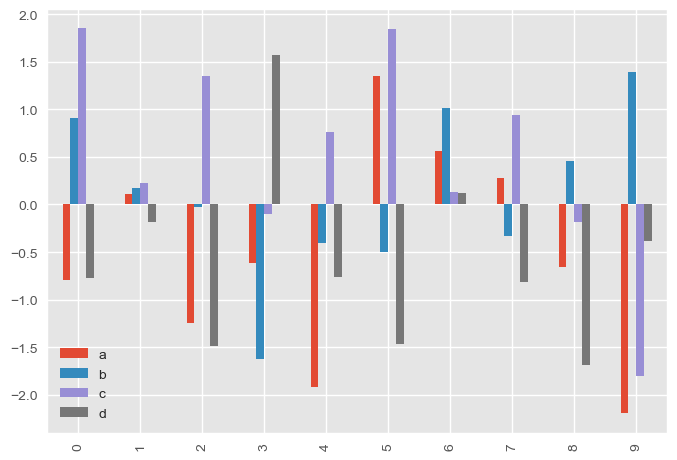

In [127]:
ax = df.plot(kind="bar");

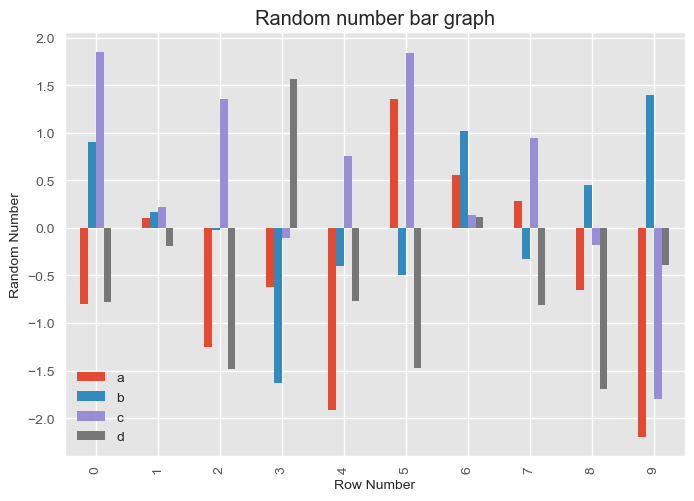

In [128]:
#customize with set() method
ax = df.plot(kind="bar")
ax.set(title="Random number bar graph", xlabel="Row Number", ylabel="Random Number")
ax.legend().set_visible(True)

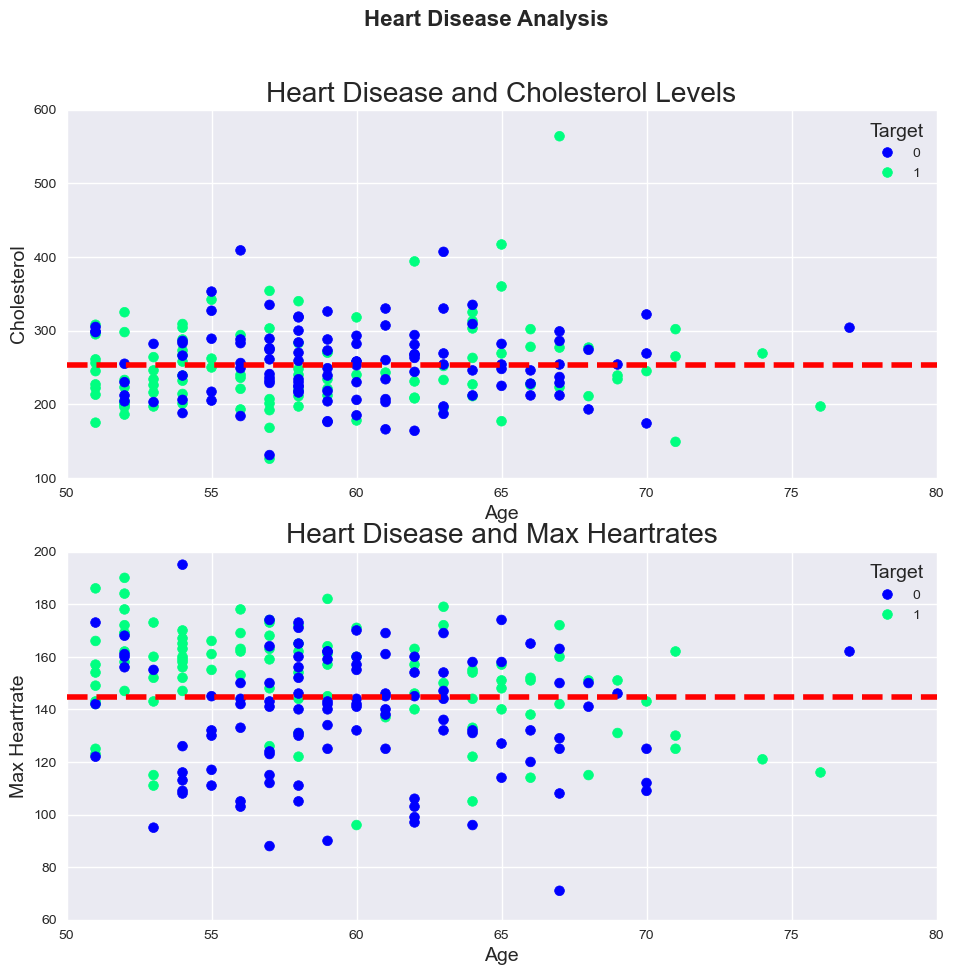

In [147]:
plt.style.use('seaborn-v0_8-darkgrid')

fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10));

#I decided to create some variables
over_age = over_50['age']
over_chol = over_50['chol']
over_thalach = over_50['thalach']
over_target = over_50['target']

#Add data to ax0
scatter = ax0.scatter(x=over_age,
                     y=over_chol,
                     c=over_target,
                     cmap='winter')

#Customize
ax0.set(title="Heart Disease and Cholesterol Levels",
       xlabel='Age',
       ylabel='Cholesterol');

#Changing the edge limits
ax0.set_xlim([50,80])
ax0.set_ylim([100,600])

#Add legend to ax0
ax0.legend(*scatter.legend_elements(), title='Target')
#Add a hor. mean line
ax0.axhline(y=over_chol.mean(),
            color='red',
            linestyle='--');

#Create the other subplot

#Add data to ax1
scatter = ax1.scatter(x=over_age,
                     y=over_thalach,
                     c=over_target,
                     cmap='winter')

#Customize
ax1.set(title="Heart Disease and Max Heartrates",
       xlabel='Age',
       ylabel='Max Heartrate');

#Changing the edge limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

#Add legend to ax1
ax1.legend(*scatter.legend_elements(), title='Target')
#Add a hor. mean line
ax1.axhline(y=over_thalach.mean(),
            color='red',
            linestyle='--')

#Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");